# 特别注意事项
## scipy的kurtosis包计算的excess kurtosis也就是，如果数据满足正态分布，其值应该是零，而不是3.
## 收益率一定要乘100，否则数据太小做估计的时候，效果会很差，迭代甚至有不运行的情况。而且liki应该是正值，不应该是负值

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 2000-01-05 00:00:00 to 2017-08-18 00:00:00
Data columns (total 6 columns):
SP500       4091 non-null float64
USDRMB      4091 non-null float64
SHINDEX     4091 non-null float64
SZINDEX     4091 non-null float64
USDINDEX    4091 non-null float64
EURUSD      4091 non-null float64
dtypes: float64(6)
memory usage: 223.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 2000-01-05 00:00:00 to 2017-08-18 00:00:00
Data columns (total 6 columns):
SP500       4091 non-null float64
USDRMB      4091 non-null float64
SHINDEX     4091 non-null float64
SZINDEX     4091 non-null float64
USDINDEX    4091 non-null float64
EURUSD      4091 non-null float64
dtypes: float64(6)
memory usage: 223.7+ KB


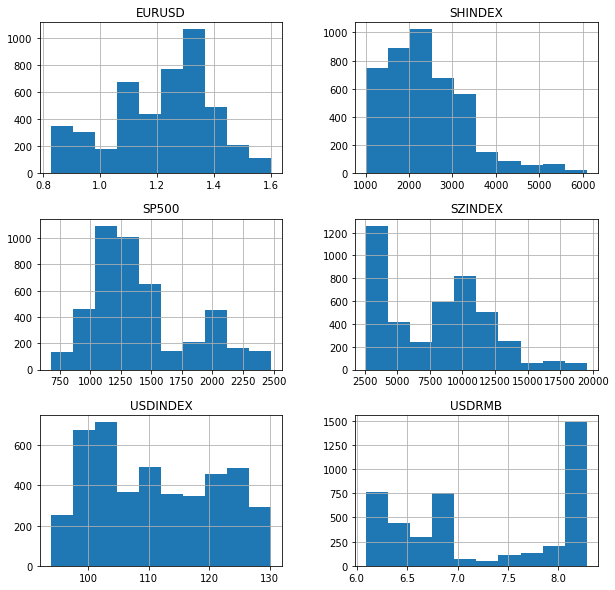

In [3]:
#-*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp
%matplotlib inline
df = pd.read_excel("yyf_prices.xls",parse_dates=[0])
df.index=df.pop('Date')
df.hist(figsize=[10,10])

df_pct_rets = 100* df.pct_change().dropna()
df_log_rets = 100*np.log(df.dropna()/df.dropna().shift(1)).dropna()

df_pct_rets.info()
df_log_rets.info()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C037DF96D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C03B70D668>]], dtype=object)

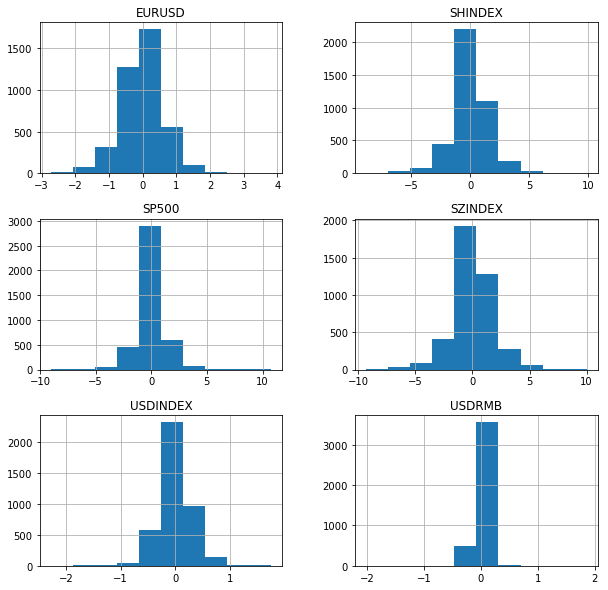

In [38]:
df_pct_rets.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C039E52F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C039691AC8>]], dtype=object)

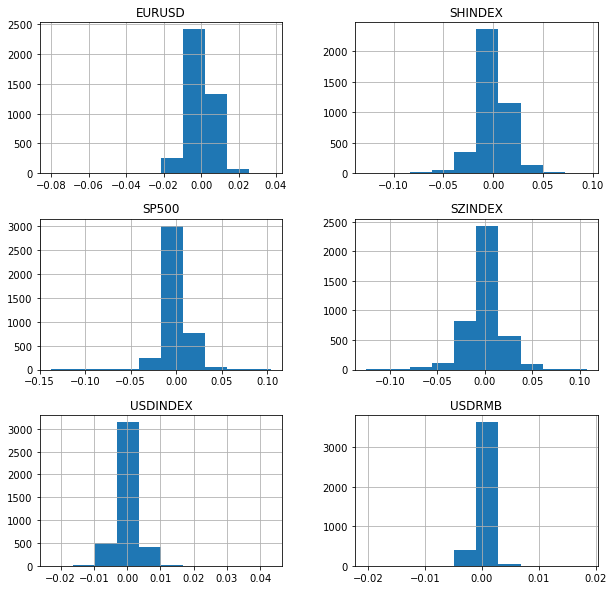

In [40]:
df_log_rets.hist(figsize=[10,10])

In [14]:
df_log_rets.describe()


,SP500,USDRMB,SHINDEX,SZINDEX,USDINDEX,EURUSD
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,0.013444,-0.005269,0.020616,0.027139,0.001059,0.003254
std,1.265054,0.108506,1.650006,1.856530,0.327590,0.669761
min,-13.777424,-2.032231,-12.763626,-12.531498,-2.301435,-8.027087
25%,-0.513461,-0.024494,-0.701659,-0.835951,-0.168847,-0.370071
50%,0.053344,0.000000,0.065536,0.053346,-0.000334,0.011009
75%,0.579883,0.016210,0.803561,0.932888,0.164335,0.367260
max,10.423558,1.840324,9.400973,10.752491,4.332160,3.748129


In [45]:
print(df_log_rets.skew())
print(df_log_rets.kurt())

SP500      -0.425268
USDRMB      0.669598
SHINDEX    -0.380678
SZINDEX    -0.348180
USDINDEX    0.441793
EURUSD     -0.389239
dtype: float64
SP500       10.727590
USDRMB      71.715019
SHINDEX      5.176679
SZINDEX      4.006025
USDINDEX    11.262928
EURUSD       6.577719
dtype: float64


In [46]:
df_pct_rets.describe()

,SP500,USDRMB,SHINDEX,SZINDEX,USDINDEX,EURUSD
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,0.015030,-0.005235,0.034246,0.045117,0.003125,0.005756
std,1.210493,0.106656,1.604210,1.799297,0.310703,0.636947
min,-9.034980,-2.011720,-8.840626,-9.289852,-2.275154,-2.728324
25%,-0.508803,-0.023634,-0.693534,-0.821900,-0.164869,-0.370007
50%,0.048817,0.000000,0.066510,0.048859,0.001699,0.008295
75%,0.567063,0.016144,0.792535,0.921329,0.162739,0.360728
max,10.789002,1.857362,9.857043,9.998804,1.751054,3.819258


In [48]:
print(df_pct_rets.skew())
print(df_pct_rets.kurt())

SP500      -0.120503
USDRMB      0.730589
SHINDEX    -0.154222
SZINDEX    -0.166664
USDINDEX    0.017948
EURUSD      0.063156
dtype: float64
SP500        7.113175
USDRMB      76.432671
SHINDEX      4.752923
SZINDEX      3.489555
USDINDEX     4.345866
EURUSD       1.661060
dtype: float64


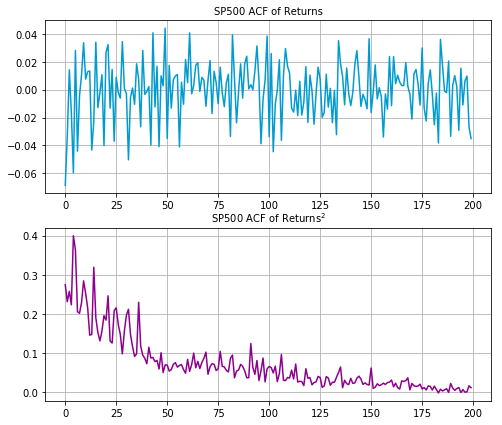

In [53]:
from statsmodels.tsa.stattools import acf
SP500_acf=acf(df_log_rets.SP500, nlags=200)
tmp=(df_log_rets.SP500)**2
SP500_acf2=acf(tmp, nlags=200)

plt.figure(figsize=(8,7),dpi=980)

p1 = plt.subplot(2,1,1)
p1.grid(True)
p1.plot(SP500_acf[1:],color='#009CD1')
p1.set_title('SP500 ACF of Returns',fontsize=10)

p2 = plt.subplot(2,1,2)
p2.grid(True)
p2.plot(SP500_acf2[1:],color='#8E008D')
p2.set_title('SP500 ACF of Returns$^{2}$',fontsize=10)

In [57]:
SP500_acf.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

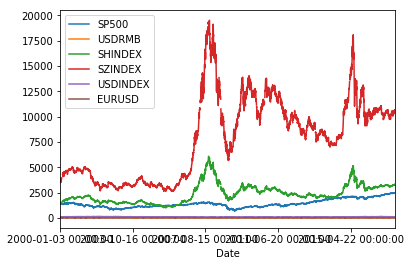

In [58]:
df.plot()

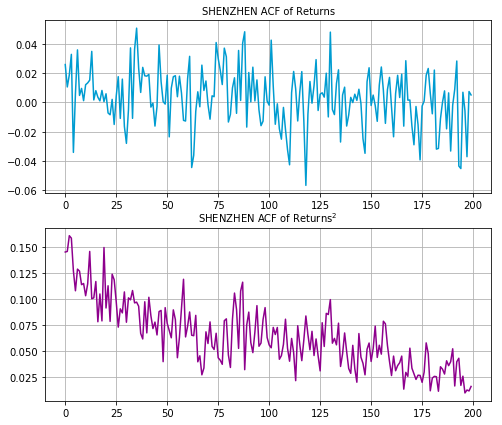

In [60]:
SZ_acf=acf(df_log_rets.SZINDEX, nlags=200)
tmp=(df_log_rets.SZINDEX)**2
SZ_acf2=acf(tmp, nlags=200)

plt.figure(figsize=(8,7),dpi=980)

p1 = plt.subplot(2,1,1)
p1.grid(True)
p1.plot(SZ_acf[1:],color='#009CD1')
p1.set_title('SHENZHEN ACF of Returns',fontsize=10)

p2 = plt.subplot(2,1,2)
p2.grid(True)
p2.plot(SZ_acf2[1:],color='#8E008D')
p2.set_title('SHENZHEN ACF of Returns$^{2}$',fontsize=10)

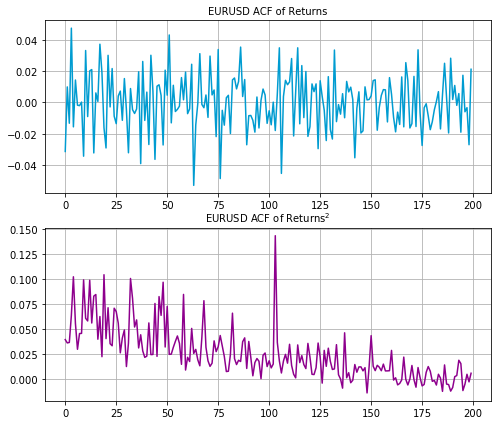

In [54]:
EURUSD_acf=acf(df_log_rets.EURUSD, nlags=200)
tmp=(df_log_rets.EURUSD)**2
EURUSD_acf2=acf(tmp, nlags=200)

plt.figure(figsize=(8,7),dpi=980)

p1 = plt.subplot(2,1,1)
p1.grid(True)
p1.plot(EURUSD_acf[1:],color='#009CD1')
p1.set_title('EURUSD ACF of Returns',fontsize=10)

p2 = plt.subplot(2,1,2)
p2.grid(True)
p2.plot(EURUSD_acf2[1:],color='#8E008D')
p2.set_title('EURUSD ACF of Returns$^{2}$',fontsize=10)

# 下面演示随机生成一个正态分布的列向量，然后绘制它的直方图
## 特别需要注意，numpy坑爹的sort命令，sort默认只做行向量的sort，列的sort它不做，也就是说如果每行只有一个元素，则调用sort命令等于是不sort任何数据，等于是不工作
## 解决办法是把sort命令里面的属性axis设置为0

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([-0.08431554])

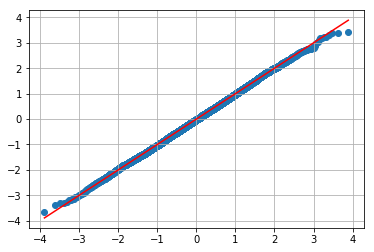

In [2]:
#def mynormqqplot(data):
#s_rts = np.sort(df_log_rets.SP500)   
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp
%matplotlib inline
tmpdata=np.random.randn(10000,1)
# more about sort function, be careful the axis
s_rts = np.sort(tmpdata,axis=0)
idx_s_rts=np.argsort(tmpdata)  
len_s_rts=len(s_rts)

norm_quant_rts=np.zeros([len_s_rts,1])


for i in range(0,len_s_rts):
    norm_quant_rts[i]=ss.norm.ppf((i+1.0-0.5)/len_s_rts)

plt.scatter(norm_quant_rts,s_rts)

min_qt=np.min(norm_quant_rts)
min_s=np.min(s_rts)
min_ax =np.min([min_qt,min_s])

max_qt=np.max(norm_quant_rts)
max_s=np.max(s_rts)
max_ax =np.max([max_qt,max_s])

ax_x=np.linspace(min_ax,max_ax,len_s_rts)
ax_y=np.linspace(min_ax,max_ax,len_s_rts)
plt.plot(ax_x,ax_y,color='r')
plt.grid(True)

ss.kurtosis(tmpdata)

In [2]:
ss.kurtosis(tmpdata)

array([-0.19435264])

# 下面回到我们前面的讨论的例子，继续用我们的数据
## 我们定义一个函数，专门用来绘制qq plot
## 需要注意一下，这是我们第一次在Python里面定义一个函数
## 然后再在后面调用它
## 当让这个函数写的也非常的简单，功能非常不全，比如我们没有专门的功能对title这些进行标注
## 此外在运行前请restart terminal 

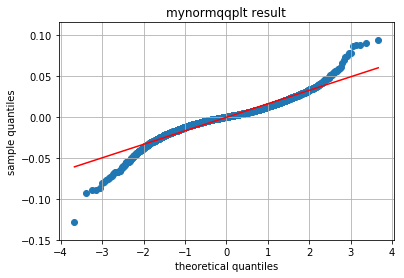

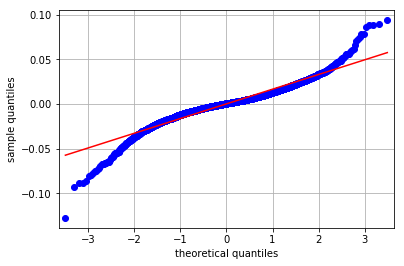

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt
%matplotlib inline

def mynormqqplot(data):
    std_data=data.std()
    s_rts = np.sort(data,axis=0)
    len_s_rts=len(s_rts)
    norm_quant_rts=np.zeros([len_s_rts,1])
    for i in range(0,len_s_rts):
        norm_quant_rts[i]=ss.norm.ppf((i+1.0-0.5)/len_s_rts)
    
    plt.figure()
    plt.scatter(norm_quant_rts,s_rts)
    
    min_qt=np.min(norm_quant_rts)
    min_s=np.min(s_rts)
    min_ax =np.min([min_qt,min_s])
    
    max_qt=np.max(norm_quant_rts)
    max_s=np.max(s_rts)
    max_ax =np.max([max_qt,max_s])
    
    ax_x=np.linspace(min_ax,max_ax,len_s_rts)
    ax_y=std_data*ax_x #std_data is like a slope
    plt.plot(ax_x,ax_y,'-',color='r')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
# mynormqqplot function END

df = pd.read_excel("yyf_prices.xls",parse_dates=[0])
df.index=df.pop('Date')
#df.hist(figsize=[10,10])

df_log_rets =  np.log(df.dropna()/df.dropna().shift(1)).dropna()

std_rts=df_log_rets.SHINDEX.std()
normalized_log_rts=np.asarray(df_log_rets.SHINDEX/std_rts)

# call our function ‘mynormqqplot’
mynormqqplot(np.asarray(df_log_rets.SHINDEX))
plt.title('mynormqqplt result')

plt.figure()
sm.qqplot(df_log_rets.SHINDEX,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

## 从上图可以看出，对数收益率只是看起来象正态分布，但是确实不是正态分布
## 尾部数据明显不满足正态分布

# 下面我们开始来讨论如何实现Garch11
# 请在运行前，restart engine!!!

Type     || mean|| std|| skew|| kurt||
Original data:   0.014618164125 0.999877773024 -0.3480523513260165 3.9996646163169807
After Garch:   0.0157070647517 1.0 -0.27938920896902253 3.4287101661194397


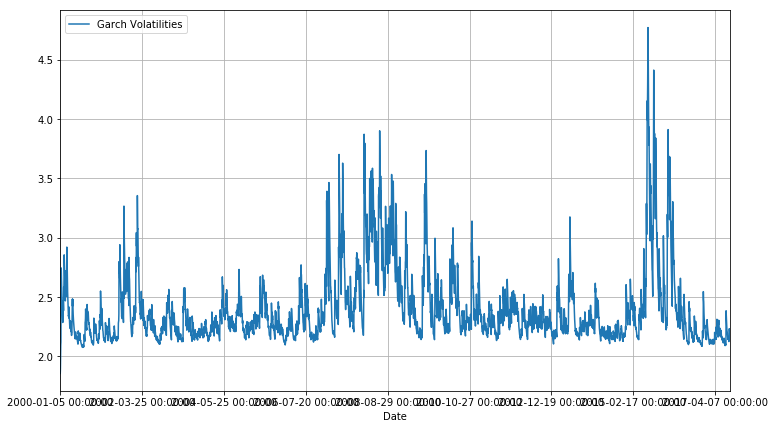

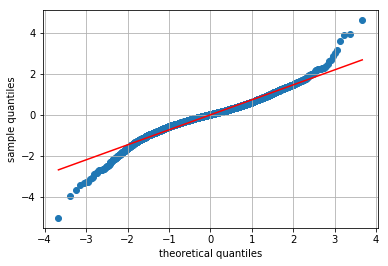

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline



def riskmetrics_volatilities(parameters, data, sigma2):
        alpha = parameters[0]
        beta = parameters[1]
        T=len(data)

        for t in range(1,T):
            sigma2[t]=(alpha*data[t-1]**2+beta*sigma2[t-1]) #yyf v2
        
        return np.copy(sigma2)

def garch_volatilities_v1(parameters, data, sigma2):
        alpha = parameters[0]
        beta = parameters[1]
        T=len(data)

        # Data and Sigma2 are assumed as T by 1 vectors
        omega=sigma2[0]*(1-alpha-beta)
        for t in range(1,T):
            sigma2[t]=omega+(alpha*data[t-1]**2+beta*sigma2[t-1]) #yyf v2
        
        return np.copy(sigma2)

def garch_volatilities_v2(parameters, data, sigma2):
        mu = parameters[0]
        alpha = parameters[1]
        beta = parameters[2]
        
        #T = np.size(data,0)
        T=len(data)
        eps = data - mu #kevein v1

        # Data and Sigma2 are assumed as T by 1 vectors
        for t in range(1,T):
            sigma2[t]=(alpha*eps[t-1]**2+beta*sigma2[t-1]) #kevein v1
            
        return np.copy(sigma2)

def Ngarch_volatilities(parameters, data, sigma2):
        alpha = parameters[0]
        beta = parameters[1]
        theta =parameters[2]
        
        T=len(data)
        omega=sigma2[0]*(1-alpha*(1+theta**2)-beta)
        for t in range(1,T):
            eps= data[t-1]-theta*np.sqrt(sigma2[t-1])
            sigma2[t]=omega+(alpha*eps**2+beta*sigma2[t-1])
        
        return np.copy(sigma2)

def General_Ngarch_volatilities(parameters, data, sigma2):
        alpha = parameters[0]
        beta = parameters[1]
        theta1 =parameters[2]
        theta2 =parameters[3]
        theta3 =parameters[4]
        
        T=len(data)
        
        omega=sigma2[0]*(1-alpha*(theta1-theta2*(1-theta1)**(2*theta3))-beta)
        for t in range(1,T):
            z=data[t-1]/np.sqrt(sigma2[t-1])
            NIF= np.power(np.abs(z-theta1)-theta2*(z-theta1),2*theta3)
            sigma2[t]=omega+(alpha*NIF*sigma2[t-1]+beta*sigma2[t-1])
    
        return np.copy(sigma2)

def gjr_garch_volatilities(parameters, data, sigma2):
        mu = parameters[0]
        omega = parameters[1]
        alpha = parameters[2]
        gamma = parameters[3]
        beta = parameters[4]
        
        T = len(data)
        #print('What is T=',T)
        eps = data - mu
        # Data and Sigma2 are T by 1 vectors
        for t in range(1,T):
            sigma2[t]=(omega+alpha*eps[t-1]**2+gamma*eps[t-1]**2 * (eps[t-1]<0)+beta*sigma2[t-1])
            
        
        return np.copy(sigma2)

def VaR_norm(vols, p):
    T=len(vols)
    invpdf=ss.norm.ppf(p)
    VaR =-invpdf*vols
    return VaR
    
    
def mynormqqplot(data):
    std_data=data.std()
    s_rts = np.sort(data,axis=0)
    len_s_rts=len(s_rts)
    norm_quant_rts=np.zeros([len_s_rts,1])
    for i in range(0,len_s_rts):
        norm_quant_rts[i]=ss.norm.ppf((i+1.0-0.5)/len_s_rts)
    
    plt.figure()
    plt.scatter(norm_quant_rts,s_rts)
    
    min_qt=np.min(norm_quant_rts)
    min_s=np.min(s_rts)
    min_ax =np.max([min_qt,min_s])
    
    max_qt=np.max(norm_quant_rts)
    max_s=np.max(s_rts)
    max_ax =np.min([max_qt,max_s])
    
    ax_x=np.linspace(min_ax,max_ax,len_s_rts)
    ax_y=std_data*ax_x #std_data is like a slope
    plt.plot(ax_x,ax_y,'-',color='r')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
# mynormqqplot function END

df = pd.read_excel("yyf_prices.xls",parse_dates=[0])
df.index=df.pop('Date')
#df.hist(figsize=[10,10])

df_log_rets = 100* np.log(df.dropna()/df.dropna().shift(1)).dropna()

tmpdata= df_log_rets.SZINDEX

# other possible data test
#tmpdata= df_log_rets.EURUSD
#tmpdata= df_log_rets.SP500
#tmpdata= df_log_rets.SHINDEX
#tmpdata= df_log_rets.SZINDEX

mean_rts = tmpdata.mean()
var_rts  = tmpdata.var()
std_rts = tmpdata.std()

T=tmpdata.count()

sigma2 = np.ones(T)*(var_rts) #initialized volatilities
analized=1 # or we should set to 252
startingVals = np.array([mean_rts,.06,.94]) ##change

#sigma2final = riskmetrics_volatilities(startingVals[1:],np.array(tmpdata), sigma2)
#sigma2final = garch_volatilities_v1(startingVals[1:],np.array(tmpdata), sigma2)
#sigma2final = garch_volatilities_v2(startingVals,np.array(tmpdata), sigma2)

# start Ngarch
#initial_vals = np.array([0.07,0.85,0.50])
#sigma2final = Ngarch_volatilities(initial_vals,np.array(tmpdata), sigma2)
# end Ngarch

# start general Ngarch
initial_vals = np.array([0.07,0.85,0.02,0.5,0.75])
sigma2final = General_Ngarch_volatilities(initial_vals,np.array(tmpdata), sigma2)
# end Ngarch

#initial_vals = np.array([mean_rts,var_rts*.01,0.03,0.09,0.90])
#sigma2final = gjr_garch_volatilities(initial_vals,np.array(tmpdata), sigma2)

garch_vol=np.sqrt(analized*sigma2final)

gr_vol = pd.DataFrame(garch_vol,index=tmpdata.index,columns=['Garch Volatilities'])

gr_vol.plot(figsize=(12,7),grid=True)


normalized_new_rts=np.asarray(tmpdata)/garch_vol

gr_vol.loc[:,'Standerized Returns'] = normalized_new_rts
gr_vol.loc[:,'Log Returns'] = tmpdata

VaR = np.zeros(T) #initialized VaR
p=0.01
VaR = VaR_norm(garch_vol,p)
gr_vol.loc[:,'VaR'] = VaR

# call our function ‘mynormqqplot’
#gr_vol

ttmp=normalized_new_rts/(normalized_new_rts.std())
# plot standerized returns using Garch 11
plt.figure()
mynormqqplot(normalized_new_rts)

#calculate FOUR MOMENTS of standerized returns using Garch 11
a1=ttmp.mean()
a2=ttmp.std()
a3=ss.skew(ttmp)
a4 =ss.kurtosis(ttmp)

std_rts=tmpdata.std()
normalized_log_rts=np.asarray(tmpdata)/std_rts

#calculate FOUR MOMENTS of original log returns
b1=normalized_log_rts.mean()
b2=normalized_log_rts.std()
b3=ss.skew(normalized_log_rts)
b4 =ss.kurtosis(normalized_log_rts)

print('Type     ||','mean||','std||','skew||','kurt||')
print('Original data:  ',b1,b2,b3,b4)
print('After Garch:  ',a1,a2,a3,a4)

gr_vol.to_csv("yyfdataout/garch_vols.csv",index_label='date')
gr_vol.to_excel("yyfdataout/garch_vols.xls",index_label='date')


In [5]:
gr_vol.head()

,Garch Volatilities,Standerized Returns,Log Returns,VaR
Date,,,,
2000-01-05 00:00:00,1.856530,-0.166220,-0.308592,4.318935
2000-01-06 00:00:00,1.895925,2.495554,4.731384,4.410581
2000-01-07 00:00:00,2.007752,2.301200,4.620239,4.670728
2000-01-10 00:00:00,2.097463,1.149829,2.411723,4.879428
2000-01-11 00:00:00,2.121183,-2.527428,-5.361138,4.934610


In [24]:
ss.norm.ppf(0.01)

-2.3263478740408408

In [14]:
sigma2[0]

0.00034467041816377546

In [8]:
3**(1.2)

3.7371928188465517

In [12]:
startingVals[1:3]

array([ 0.09,  0.9 ])

In [6]:
gr_vol.tail()

,Garch Volatilities,Standerized Returns,Log Returns
Date,,,
2017-08-14 00:00:00,0.052824,0.415643,0.021956
2017-08-15 00:00:00,0.053162,0.071343,0.003793
2017-08-16 00:00:00,0.053068,0.073024,0.003875
2017-08-17 00:00:00,0.052984,0.094038,0.004983
2017-08-18 00:00:00,0.052917,-0.070457,-0.003728


In [6]:
mynormqqplot(normalized_new_rts)

NameError: name 'normalized_new_rts' is not defined

In [8]:
ttmp=normalized_new_rts/normalized_new_rts.std()
a1=ttmp.mean()
a2=ttmp.std()
a3=ss.skew(ttmp)
a4 =ss.kurtosis(ttmp)
print(a1,a2,a3,a4)

std_rts=tmpdata.std()
normalized_log_rts=np.asarray(tmpdata)/std_rts

b1=normalized_log_rts.mean()
b2=normalized_log_rts.std()
b3=ss.skew(normalized_log_rts)
b4 =ss.kurtosis(normalized_log_rts)
print(b1,b2,b3,b4)


0.0120120598058 1.0 -0.2775212690185174 2.927401571414615
0.0124942989798 0.999877773024 -0.3805383841069472 5.1688877882752955


In [49]:
tmpdata.head()

Date
2000-01-05 00:00:00    0.002352
2000-01-06 00:00:00    0.037769
2000-01-07 00:00:00    0.035341
2000-01-10 00:00:00    0.018623
2000-01-11 00:00:00   -0.043202
Name: SHINDEX, dtype: float64

In [46]:
normalized_new_rts

array([ 0.14251578,  2.41078127,  1.89478934, ..., -0.23284716,
        1.11453178,  0.01484554])

In [51]:
0.037769/0.015667

2.4107359417884724

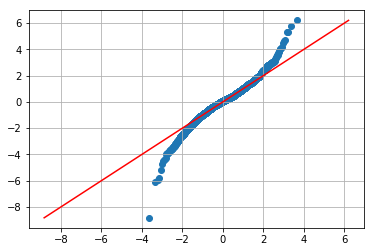

In [45]:
mynormqqplot(normalized_new_rts)

In [41]:
garch_vol

array([ 0.01650006,  0.01566656,  0.01865159, ...,  0.006359  ,
        0.00605386,  0.00606919])

In [ ]:
tmpdata2=np.asarray(df_log_rets.SP500,order='F')
tmp3=tmpdata2.T
mynormqqplot(tmpdata2)

In [41]:
?np.asarray

In [5]:
df_log_rets.SP500.count()

4091

In [64]:
len_s_rts=len(s_rts)

In [3]:
len_s_rts

500

In [82]:
ss.norm.ppf((2-0.5)/2513)

-3.2403591632986499

In [9]:
tmpdata[0:10]

array([[ 2.00207188],
       [ 0.04420734],
       [ 1.30273423],
       [ 0.56905999],
       [-2.77393438],
       [-0.24909298],
       [-0.87339187],
       [-0.32416108],
       [-0.75571403],
       [-1.09388283]])

In [33]:
info(tmpdata)

NameError: name 'info' is not defined

In [31]:
len(tmpdata)

1000

In [16]:
tmpdata3=np.asarray(df_log_rets.SP500)
np.sort(tmpdata3,axis=0)

array([-0.13777424, -0.09469514, -0.09353656, ...,  0.06836638,
        0.10245733,  0.10423558])

In [17]:
np.sort(tmpdata3)

array([-0.13777424, -0.09469514, -0.09353656, ...,  0.06836638,
        0.10245733,  0.10423558])

In [38]:
tmpdata10=df_log_rets.SHINDEX
tmpdata10[1]

0.037768650228951144

In [3]:
for i in range(0,10):
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9


In [ ]:
# 下面开始演示参数估计

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7869.802372123189
            Iterations: 19
            Function evaluations: 89
            Gradient evaluations: 19
Initial Values= [ 0.4   0.96]   Initila Likilihood= 10600.6569201
Estimated Values= [ 0.04725551  0.95274449] Estimated Likilihood= 7869.80237212
Type          ||      mean      ||      std     ||       skew     ||      kurt      ||
Original data:   0.014618164125 0.999877773024 -0.3480523513260165 3.9996646163169807
After Garch:    0.00924431295491 1.0 -0.23455818354564506 2.8117975908206096


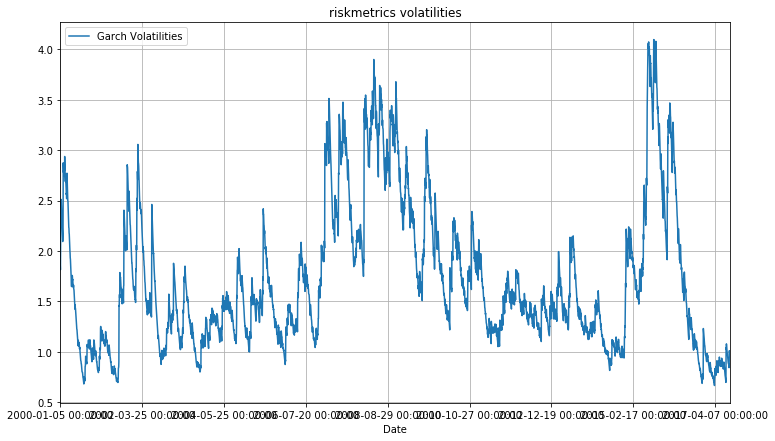

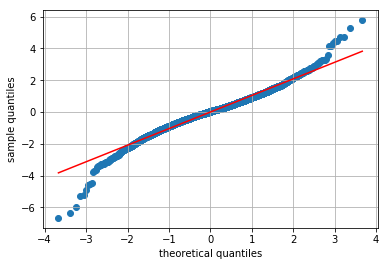

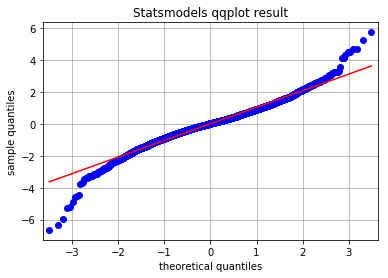

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp
%matplotlib inline

def riskmetrics_likelihood(parameters, data, sigma2,out = None):
        alpha = parameters[0]
        beta = parameters[1]
        T=len(data)

        # Data and Sigma2 are assumed as T by 1 vectors

        #sigma2[0]=(np.std(data))**2 #yyf v2
        for t in range(1,T):
            sigma2[t]=(alpha*data[t-1]**2+beta*sigma2[t-1]) #yyf v2
        
        logliks = 0.5*(np.log(2*np.pi)+np.log(sigma2)+data**2/sigma2)
        loglik = np.sum(logliks)
        
        if out is None:
            return loglik
        else:
            return loglik, logliks, np.copy(sigma2)
        
def riskmetrics_constraint(parameters, data, sigma2, out=None):
        alpha = parameters[0]
        beta = parameters[1]
        return np.array([1-alpha-beta])

def garch_likelihood_v1(parameters, data, sigma2,out = None):
        alpha = parameters[0]
        beta = parameters[1]
        T=len(data)

        # Data and Sigma2 are assumed as T by 1 vectors
        
        #sigma2[0]=(np.std(data))**2 #yyf v2
        omega=sigma2[0]*(1-alpha-beta)
        for t in range(1,T):
            sigma2[t]=omega+(alpha*data[t-1]**2+beta*sigma2[t-1]) #yyf v2
        
        logliks = 0.5*(np.log(2*np.pi)+np.log(sigma2)+data**2/sigma2)
        loglik = np.sum(logliks)
        
        if out is None:
            return loglik
        else:
            return loglik, logliks, np.copy(sigma2)

def garch_constraint_v1(parameters, data, sigma2, out=None):
        alpha = parameters[0]
        beta = parameters[1]
        return np.array([1-alpha-beta])


def mynormqqplot(data):
    std_data=data.std()
    s_rts = np.sort(data,axis=0)
    len_s_rts=len(s_rts)
    norm_quant_rts=np.zeros([len_s_rts,1])
    for i in range(0,len_s_rts):
        norm_quant_rts[i]=ss.norm.ppf((i+1.0-0.5)/len_s_rts)
    
    plt.figure()
    plt.scatter(norm_quant_rts,s_rts)
    
    min_qt=np.min(norm_quant_rts)
    min_s=np.min(s_rts)
    min_ax =np.max([min_qt,min_s])
    
    max_qt=np.max(norm_quant_rts)
    max_s=np.max(s_rts)
    max_ax =np.min([max_qt,max_s])
    
    ax_x=np.linspace(min_ax,max_ax,len_s_rts)
    ax_y=std_data*ax_x #std_data is like a slope
    plt.plot(ax_x,ax_y,'-',color='r')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
# mynormqqplot function END

df = pd.read_excel("yyf_prices.xls",parse_dates=[0])
df.index=df.pop('Date')
#df.hist(figsize=[10,10])

df_pct_rets = 100* df.pct_change().dropna()
df_log_rets =  100* np.log(df.dropna()/df.dropna().shift(1)).dropna()

#tmpdata= df_pct_rets.EURUSD
#tmpdata= df_pct_rets.SP500
#tmpdata= df_pct_rets.SHINDEX
#tmpdata= df_pct_rets.SZINDEX


#tmpdata= df_log_rets.SZINDEX

# other possible data test
#tmpdata= df_log_rets.EURUSD
#tmpdata= df_log_rets.SP500
#tmpdata= df_log_rets.SHINDEX
tmpdata= df_log_rets.SZINDEX

mean_rts = tmpdata.mean()
var_rts  = tmpdata.var()
std_rts = tmpdata.std()

T=tmpdata.count()

sigma2 = np.ones(T)*(var_rts) #initialized volatilities
args = (np.asarray(tmpdata),sigma2)
analized=1 # or we should set to 252

garch_list =['riskmetrics','garch_v1','garch_v2','Ngarch','gjr']
garch_type =garch_list[0]

if garch_type == 'riskmetrics':
# riskmetrics
    rm_initial_vals = np.array([0.4,0.96]) ##change
    iniloglik,_,_ = riskmetrics_likelihood(rm_initial_vals,np.array(tmpdata), sigma2, out=True)
    rm_bounds  =[(0.0,1.0),(0.0,1.0)]
    estimates = fmin_slsqp(riskmetrics_likelihood, rm_initial_vals, f_ieqcons=riskmetrics_constraint, bounds=rm_bounds, args =args)
    loglik, logliks, sigma2final = riskmetrics_likelihood(estimates,np.array(tmpdata), sigma2, out=True)
    print('Initial Values=',rm_initial_vals,'  Initila Likilihood=',iniloglik)
elif garch_type == 'garch_v1':
# garch v1    
    garchv1_initial_vals = np.array([.09,.90]) ##change
    iniloglik,_,_ = garch_likelihood_v1(garchv1_initial_vals,np.array(tmpdata), sigma2, out=True)
    garchv1_bounds  =[(0.0,1.0),(0.0,1.0)]
    estimates = fmin_slsqp(garch_likelihood_v1, garchv1_initial_vals, f_ieqcons=riskmetrics_constraint, bounds=garchv1_bounds, args =args)
    loglik, logliks, sigma2final = garch_likelihood_v1(estimates,np.array(tmpdata), sigma2, out=True)
    print('Initial Values=',garchv1_initial_vals,'  Initila Likilihood=',iniloglik)
elif garch_type == 'garch_v2':
# garch v2
    garchv2_initial_vals = np.array([mean_rts,.09,.90]) ##change
    iniloglik,_,_ = garch_likelihood_v2(garchv2_initial_vals,np.array(tmpdata), sigma2, out=True)
    
    garchv2_bounds  =[(-10*mean_rts,10*mean_rts),(0.0,0.5),(0.0,1.0)]
    estimates = fmin_slsqp(garch_likelihood_v2, garchv2_initial_vals, f_ieqcons=riskmetrics_constraint, bounds=garchv2_bounds, args =args)
    loglik, logliks, sigma2final = garch_likelihood_v2(estimates,np.array(tmpdata), sigma2, out=True)
    print('Initial Values=',garchv2_initial_vals,'  Initila Likilihood=',iniloglik)
elif garch_type == 'Ngarch':
# Ngarch    
    Ngarch_initial_vals = np.array([0.000005,0.07,0.85,0.50])
    iniloglik,_,_ = Ngarch_likelihood(Ngarch_initial_vals,np.array(tmpdata), sigma2, out=True)
    
    Ngarch_bounds  =[(0.0,0.99),(0.0,0.99),(0.0,1.0),(0.0,1.0)]
    estimates = fmin_slsqp(Ngarch_likelihood, Ngarch_initial_vals, f_ieqcons=Ngarch_constraint, bounds=Ngarch_bounds, args =args)
    loglik, logliks, sigma2final = Ngarch_likelihood(estimates,np.array(tmpdata), sigma2, out=True)
    print('Initial Values=',Ngarch_initial_vals,'  Initila Likilihood=',iniloglik)
elif garch_type == 'gjr':
#gjr garch
    gjr_initial_vals = np.array([mean_rts,var_rts*.01,.03,.09,.90])
    iniloglik,_,_ = gjr_garch_likelihood(gjr_initial_vals,np.array(tmpdata), sigma2, out=True)
    
    finfo=np.finfo(np.float64)
    gjr_bounds  =[(-10*mean_rts,10*mean_rts),(finfo.eps,2*var_rts),(0.0,1.0),(0.0,1.0),(0.0,1.0)]
    estimates = fmin_slsqp(gjr_garch_likelihood, gjr_initial_vals, f_ieqcons=gjr_constraint, bounds=gjr_bounds, args =args)
    print('Initial Values=',gjr_initial_vals,'  Initila Likilihood=',iniloglik)
    loglik, logliks, sigma2final = gjr_garch_likelihood(estimates,np.array(tmpdata), sigma2, out=True)
else:
    print('Sorry we dont have the type you required.')

print('Estimated Values=',estimates,'Estimated Likilihood=',loglik)


garch_vol=np.sqrt(analized*sigma2final)

gr_vol = pd.DataFrame(garch_vol,index=tmpdata.index,columns=['Garch Volatilities'])

title_name=garch_type+' volatilities'
gr_vol.plot(figsize=(12,7),grid=True,title=title_name)


normalized_new_rts=np.asarray(tmpdata)/garch_vol

gr_vol.loc[:,'Standerized Returns'] = normalized_new_rts
gr_vol.loc[:,'Log Returns'] = tmpdata
# call our function ‘mynormqqplot’
#gr_vol

ttmp=normalized_new_rts/(normalized_new_rts.std())
# plot standerized returns using Garch 11
#mynormqqplot(ttmp)
mynormqqplot(normalized_new_rts)

plt.figure()
sm.qqplot(normalized_new_rts,line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('Statsmodels qqplot result')


#calculate FOUR MOMENTS of standerized returns using Garch 11
a1=ttmp.mean()
a2=ttmp.std()
a3=ss.skew(ttmp)
a4 =ss.kurtosis(ttmp)

std_rts=tmpdata.std()
normalized_log_rts=np.asarray(tmpdata)/std_rts

#calculate FOUR MOMENTS of original log returns
b1=normalized_log_rts.mean()
b2=normalized_log_rts.std()
b3=ss.skew(normalized_log_rts)
b4 =ss.kurtosis(normalized_log_rts)

print('Type          ||','     mean      ||','     std     ||','      skew     ||','     kurt      ||')
print('Original data:  ',b1,b2,b3,b4)
print('After Garch:   ',a1,a2,a3,a4)


In [7]:
garch_type+garch_type

'riskmetricsriskmetrics'

In [26]:
rm_initial_vals = np.array([.04,.96]) ##change
rmloglik,_,_ = riskmetrics_likelihood(rm_initial_vals,np.array(tmpdata), sigma2, out=True)
rmloglik

7871.3480058581936

In [4]:
var_rts

0.00034467041816377546

In [31]:
title_nm =str(print( 'Jim','Green'))
title_nm

Jim Green


'None'

In [32]:
type(title_nm )


str

In [30]:
type('jim' )


str

In [2]:
title_nme

'None'

In [6]:
T=np.size(tmpdata,0)
T

IndexError: tuple index out of range

In [2]:
np.abs(-1.3)

1.3

In [10]:
epp=-2.5
ttaa=(epp<0)

In [11]:
ttaa

True

In [12]:
np.array(ttaa)

array(True, dtype=bool)

In [8]:
np.percentile(tmpdata, 1, axis=0)

-5.8110474497953062

In [9]:
np.min(tmpdata)

-12.53149833027665

In [10]:
np.percentile(tmpdata, 5, axis=0)

-2.9044199169311664

In [11]:
np.percentile(tmpdata, 10, axis=0)

-1.9474862570498619

In [12]:
np.percentile(tmpdata, 25, axis=0)

-0.8359511873235872

In [15]:
np.percentile(tmpdata, 50, axis=0)

0.053345786867628864

In [16]:
np.percentile(tmpdata, 75, axis=0)

0.93288761111017526

In [20]:
import scipy as sp
sp.special.gammaln(1)

0.0

In [12]:
?sm.qqplot